## Extinction Curves Plots

# Introduction

In the realm of interstellar medium (ISM), the presence of dust results in the attenuation of background starlight. This phenomenon, known as extinction, is characterized by a wavelength-dependent process termed reddening. The extinction effect is such that shorter wavelengths experience more substantial attenuation compared to longer wavelengths.

For those unfamiliar with extinction, let's briefly explore the relevant quantities involved. The fractional change in the flux of starlight ($\frac{dF_\lambda}{F_\lambda}$) is expressed as a function of optical depth ($\tau_\lambda$), which varies with wavelength. The integration along the line of sight yields a resultant flux as an exponential function of optical depth:
$$
\tau_\lambda = -\ln\left(\frac{F_\lambda}{F_{\lambda,0}}\right)
$$
To align with magnitude definitions, the base is commonly changed from $e$ to 10, resulting in:
$$
\tau_\lambda = -2.303\log\left(\frac{F_\lambda}{F_{\lambda,0}}\right)
$$
Extinction ($A_\lambda$) is then defined as $1.086\tau_\lambda$, or equivalently:
$$
A_\lambda = -2.5\log\left(\frac{F_\lambda}{F_{\lambda,0}}\right)
$$

The key insights from this derivation are:

1. Extinction introduces a multiplying factor of $10^{-0.4A_\lambda}$ to the flux.
2. Extinction is defined in relation to the flux without dust ($F_{\lambda,0}$).

Upon installing Astropy and affiliated packages, we can import the necessary functionalities as required.


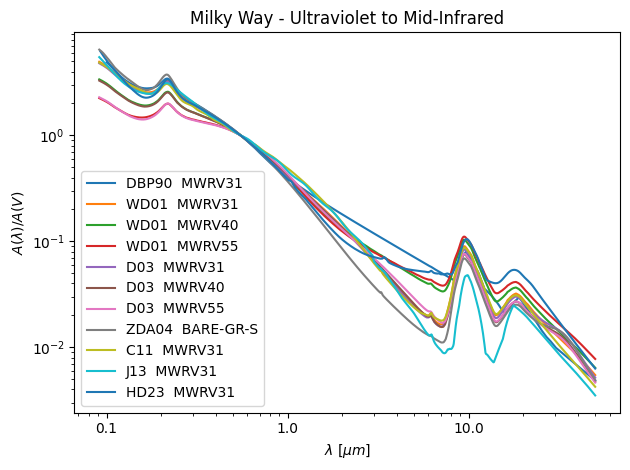

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import astropy.units as u

from dust_extinction.grain_models import DBP90, WD01, D03, ZDA04, C11, J13, HD23

fig, ax = plt.subplots()

# generate the curves and plot them
lam = np.logspace(np.log10(0.0912), np.log10(50.), num=1000)
x = (1.0 / lam) / u.micron

models = [DBP90,
          WD01, WD01, WD01,
          D03, D03, D03,
          ZDA04,
          C11, J13,
          HD23]
modelnames = ["MWRV31",
              "MWRV31", "MWRV40", "MWRV55",
              "MWRV31", "MWRV40", "MWRV55",
              "BARE-GR-S",
              "MWRV31", "MWRV31",
              "MWRV31"]

for cmodel, cname in zip(models, modelnames):
   ext_model = cmodel(cname)

   indxs, = np.where(np.logical_and(
      x.value >= ext_model.x_range[0],
      x.value <= ext_model.x_range[1]))
   yvals = ext_model(x[indxs])
   ax.plot(lam[indxs], yvals, label=f"{ext_model.__class__.__name__}  {cname}")

ax.set_xlabel('$\lambda$ [$\mu m$]')
ax.set_ylabel(r'$A(\lambda)/A(V)$')
ax.set_title('Grain Models')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Milky Way - Ultraviolet to Mid-Infrared')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

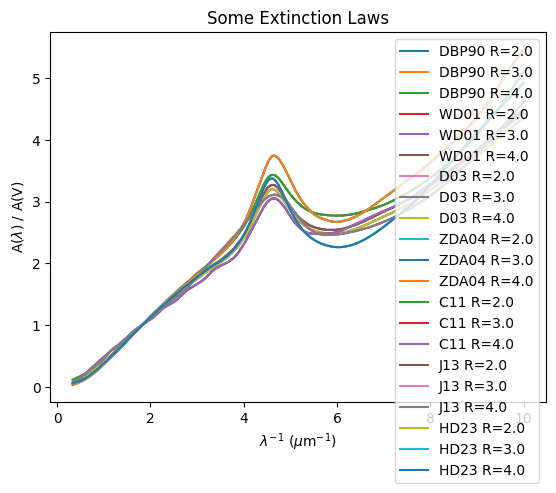

In [16]:
wav = np.arange(0.1, 3.0, 0.001)*u.micron
for model in [DBP90, WD01, D03, ZDA04, C11, J13, HD23]:
    for R in (2.0,3.0,4.0):
        # Initialize the extinction model
        ext = model()
        plt.plot(1/wav, ext(wav), label=model.name+' R='+str(R))

plt.xlabel('$\lambda^{-1}$ ($\mu$m$^{-1}$)')
plt.ylabel('A($\lambda$) / A(V)')
plt.legend(loc='best')
plt.title('Some Extinction Laws')
plt.show()

## SLOAN DIGITAL SKY SURVEY VS GAIA: WHO WINS?


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from astroquery.gaia import Gaia
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

from astropy.table import Table
from itertools import chain

linewidths= 2
axislinewidths=2
lenticks=6
rc('font',family='sans-serif',size=18)
rc('xtick.major',size=lenticks)
rc('xtick.minor',size=lenticks*2/3)
rc('ytick.major',size=lenticks)
rc('ytick.minor',size=lenticks*2/3)

In [20]:
tables = Gaia.load_tables(only_names=True)
'''for table in (tables):
  if 'gaiadr3' in table.get_qualified_name():
     print(table.get_qualified_name());'''


INFO:astroquery:Retrieving tables...


INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Done.


INFO: Done. [astroquery.utils.tap.core]


"for table in (tables):\n  if 'gaiadr3' in table.get_qualified_name():\n     print(table.get_qualified_name());"

In [21]:
query2 = """SELECT
TOP 3000
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
"""
query1 = """SELECT
source_id, ra, dec, pmra, pmdec, parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
FROM external.gaiaedr3_gcns_main_1
WHERE parallax >50
"""

job = Gaia.launch_job_async(query1)
results = job.get_results()
print(results.info)
print(results.columns)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
<Table length=2575>
      name        dtype    unit                                                                                                 description                                                                                               n_bad
---------------- ------- -------- ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- -----
       source_id   int64                                                                                                        Gaia eDR3 unique source identifier. Note that this *cannot* be matched against the DR1 or DR2 source_ids.     0
              ra float64      deg                                                                                                                                                                    ICRS right as

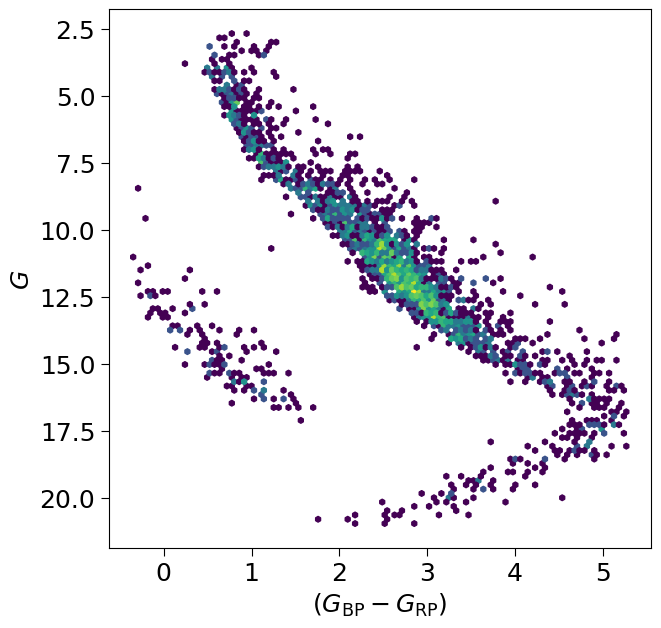

In [22]:
#Color Magnitude
cmd=results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
fig,axcmd=plt.subplots(1,1,figsize=(7,7))
axcmd.hexbin(cmd,results['phot_g_mean_mag'],bins='log',mincnt=1)
axcmd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axcmd.set_ylabel(r'$G$')
axcmd.invert_yaxis()
plt.show()

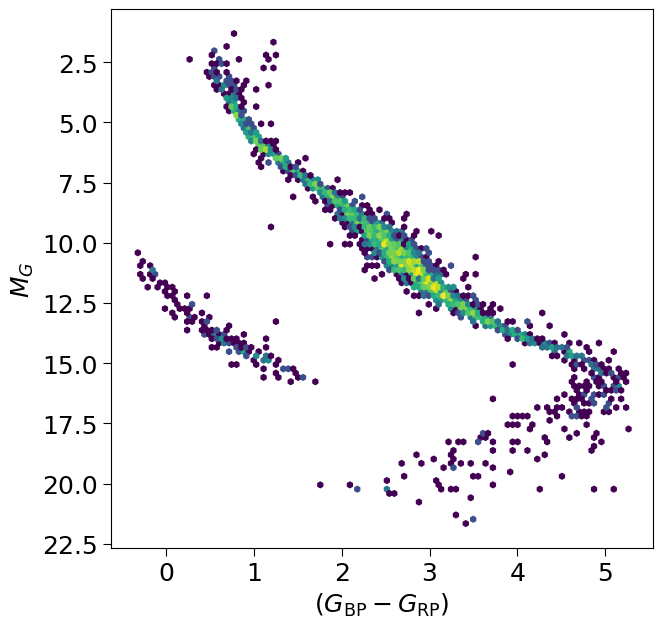

In [23]:
#HR Diagram
cmd=results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
fig,axcmd=plt.subplots(1,1,figsize=(7,7))
absmag=results['phot_g_mean_mag']+5*np.log10(results['parallax'])-10 #units of parallax are milli arc secs.
axcmd.hexbin(cmd,absmag,bins='log',mincnt=1)
axcmd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axcmd.set_ylabel(r'$M_{G}$')
axcmd.invert_yaxis()
plt.show()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


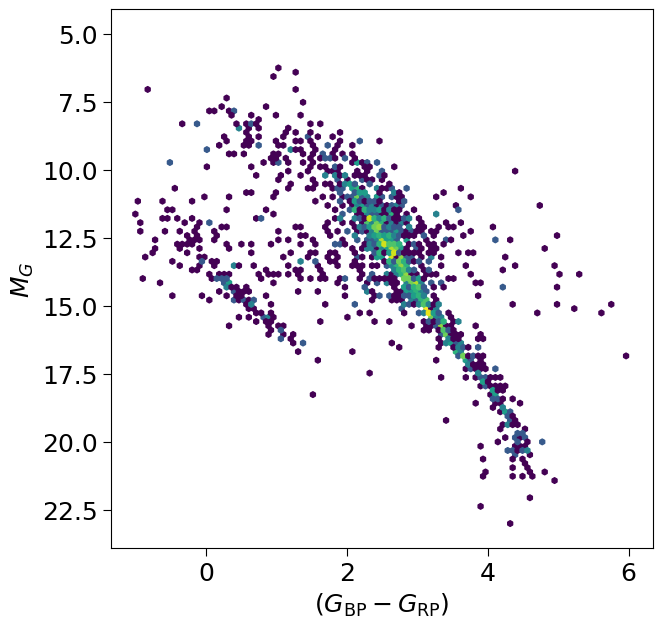

In [24]:
#SLOAN DIGITAL SKY SURVEY

query3 = """SELECT
source_id, ra, dec, pmra, pmdec, parallax,gmag_gunn,imag_gunn,rmag_gunn,zmag_gunn
FROM external.gaiaedr3_gcns_main_1
WHERE parallax >50
"""

job = Gaia.launch_job_async(query3)
results_sdss=job.get_results()
#HR of SDSS.
cmd=results_sdss['gmag_gunn']-results_sdss['imag_gunn']
fig,axcmd=plt.subplots(1,1,figsize=(7,7))
abs_mag=results_sdss['gmag_gunn']+5*np.log10(results_sdss['parallax'])-10 #units of parallax are milli arc secs.
axcmd.hexbin(cmd,abs_mag,bins='log',mincnt=1,extent=(-1, 6, 5, 23))
axcmd.set_xlabel(r'$(G_\mathrm{BP}-G_\mathrm{RP})$')
axcmd.set_ylabel(r'$M_{G}$')
axcmd.invert_yaxis()
plt.show()


# Population Growth of different Countries over time(I did say this document was random)


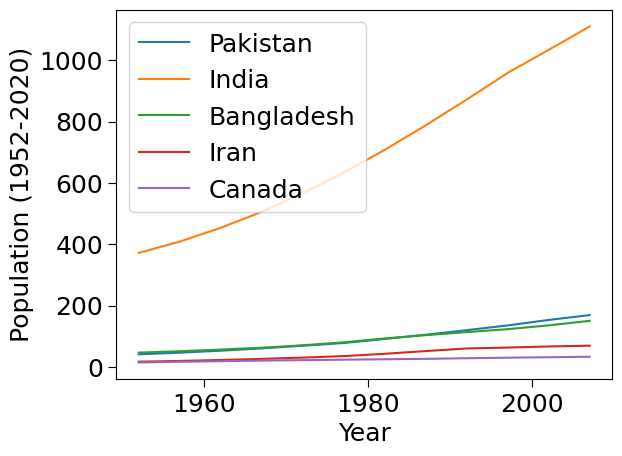

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
data=pd.read_csv("countries.csv")

Pak=data[data.country=='Pakistan']
Ind=data[data.country=='India']
Ban=data[data.country=='Bangladesh']
Iran=data[data.country=='Iran']
Canada=data[data.country=='Canada']
plt.plot(Pak.year,Pak.population/10**6)
plt.plot(Ind.year,Ind.population/10**6)
plt.plot(Ban.year,Ban.population/10**6)
plt.plot(Iran.year,Iran.population/10**6)
plt.plot(Canada.year,Canada.population/10**6)
plt.legend(['Pakistan','India','Bangladesh','Iran','Canada'])
plt.xlabel('Year')
plt.ylabel('Population (1952-2020)')
plt.show()

## Population Growth Percentage Rate over time

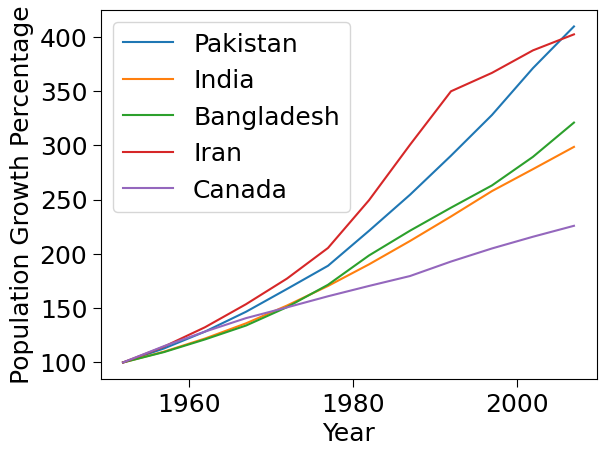

In [30]:
plt.plot(Pak.year,Pak.population/Pak.population.iloc[0]*100)
plt.plot(Ind.year,Ind.population/Ind.population.iloc[0]*100)
plt.plot(Ban.year,Ban.population/Ban.population.iloc[0]*100)
plt.plot(Iran.year,Iran.population/Iran.population.iloc[0]*100)
plt.plot(Canada.year,Canada.population/Canada.population.iloc[0]*100)
plt.legend(['Pakistan','India','Bangladesh','Iran','Canada'])
plt.xlabel('Year')
plt.ylabel('Population Growth Percentage')
plt.show()

## Plotting and Animation with Verlet Algorithms

Starting off with something basic. Almost every problem in physics can be modelled as a mass on a spring so...why not?

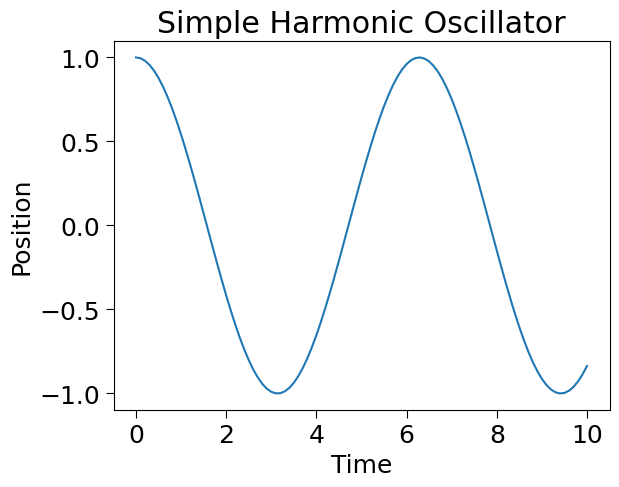

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Define the function for the Simple Harmonic Oscillator potential
def V(x, k):
    return 0.5 * k * x**2

# Define the function for the force
def F(x, k):
    return -k * x

# Define the Velocity Verlet algorithm for the Simple Harmonic Oscillator
def velocity_verlet(x0, v0, k, m, dt, num_steps):
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    x[0] = x0
    v[0] = v0
    a = F(x[0], k) / m
    for i in range(num_steps):
        x[i+1] = x[i] + v[i]*dt + 0.5*a*dt**2
        a_new = F(x[i+1], k) / m
        v[i+1] = v[i] + 0.5*(a + a_new)*dt
        a = a_new
    return x

# Set the initial conditions
x0 = 1.0
v0 = 0.0
k = 1.0
m = 1.0
dt = 0.1
num_steps = 100

# Run the simulation
x = velocity_verlet(x0, v0, k, m, dt, num_steps)

# Plot the results
t = np.arange(num_steps+1) * dt
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simple Harmonic Oscillator')
plt.show()

# Write the data to a CSV file
data = [['Time', 'Position']]
for i in range(num_steps+1):
    data.append([i*dt, x[i]])

with open('simple_harmonic_oscillator.csv', mode='w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(data)


## The Two Body Verlet Problem

Kicking it up a notch


<ipython-input-32-44858ebc8935>:25: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
<ipython-input-32-44858ebc8935>:26: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
<ipython-input-32-44858ebc8935>:33: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
<ipython-input-32-44858ebc8935>:34: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")
<ipython-input-32-44858ebc8935>:54: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
<ipython-input-32-44858ebc8935>:56: DeprecationWarning: scipy.linspace is depre

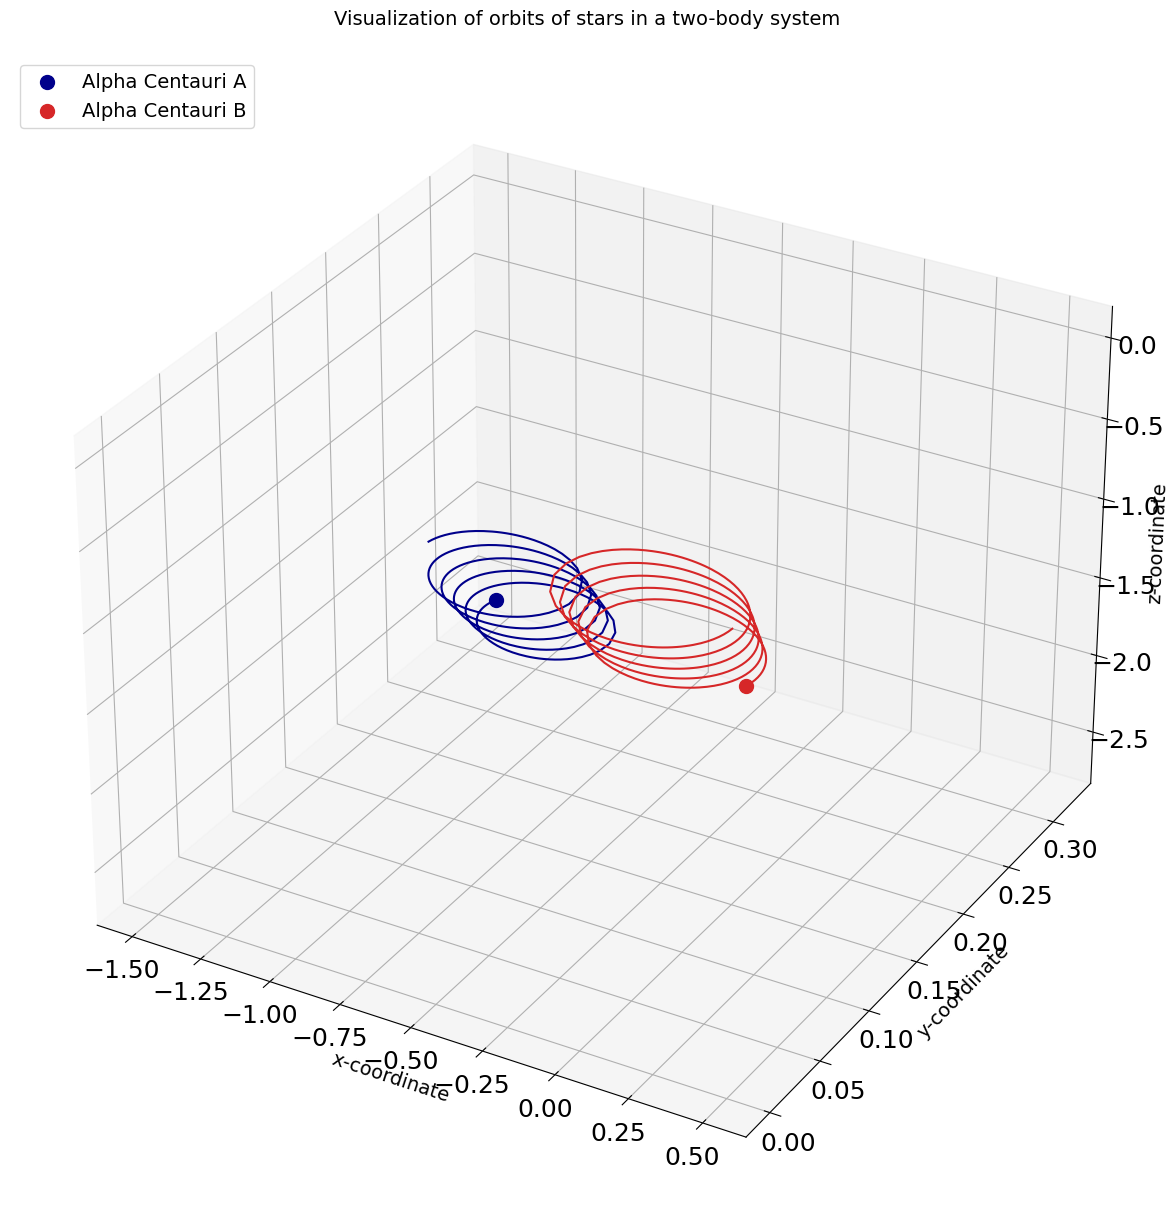

In [32]:
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

#A function defining the equations of motion
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

## The Unstable Three Body Verlet Problem

Kicking it up two notches

<ipython-input-33-6fbe759eddac>:28: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
<ipython-input-33-6fbe759eddac>:29: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
<ipython-input-33-6fbe759eddac>:30: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r3=sci.array(r3,dtype="float64")
<ipython-input-33-6fbe759eddac>:38: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
<ipython-input-33-6fbe759eddac>:39: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")
<ipython-input-33-6fbe759eddac>:40: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.

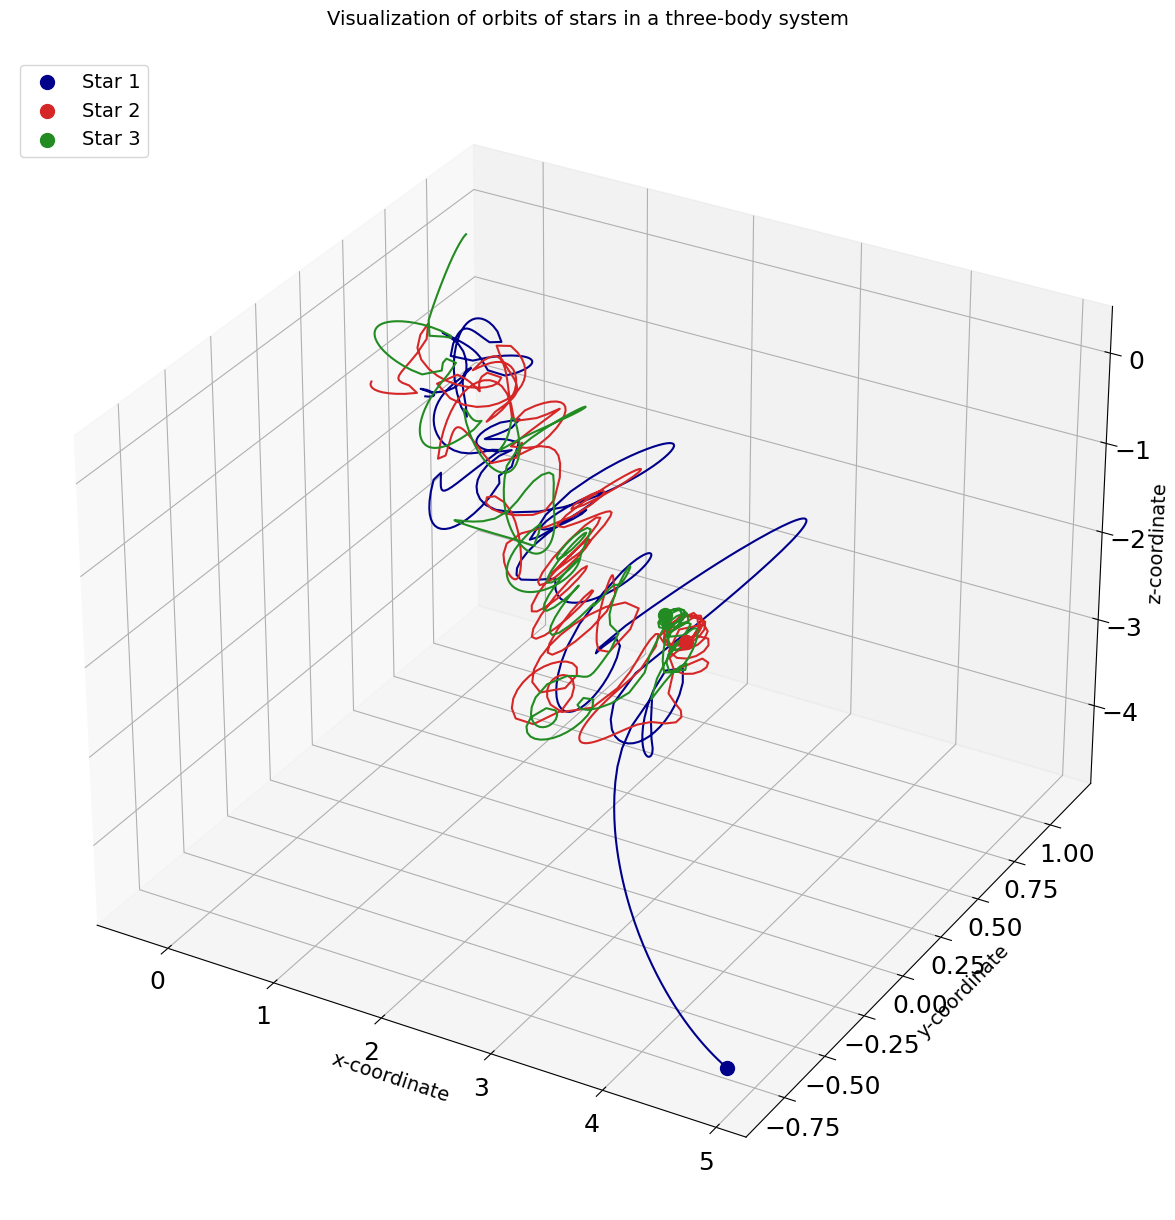

In [33]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
m3=1.5 #Third body
#Define initial position vectors
r1=[0.9,0,0] #m
r2=[0.4,0,0] #m
r3=[-0.3,1,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
r3=sci.array(r3,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Define initial velocities
v1=[0.1,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
v3=[0,-0.01,0] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

#A function defining the equations of motion
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    dv1bydt=K1*(m2*(r2-r1)/r12**3+m3*(r3-r1)/r13**3)
    dv2bydt=K1*(m1*(r1-r2)/r12**3+m3*(r3-r2)/r23**3)
    dv3bydt=K1*(m1*(r1-r3)/r13**3+m2*(r2-r3)/r23**3)
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r_derivs = sci.concatenate((dr1bydt, dr2bydt, dr3bydt))
    derivs = sci.concatenate((r_derivs, dv1bydt, dv2bydt, dv3bydt))

    return derivs



#Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="forestgreen")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Star 1")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Star 2")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="forestgreen",marker="o",s=100,label="Star 3")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)
